<a href="https://colab.research.google.com/github/atishayj4in/Stock_Price_Prediction_Model/blob/main/StockPricePredictionModel_by_AtishayJain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Stock Price Prediction Model by Atishay Jain***

---

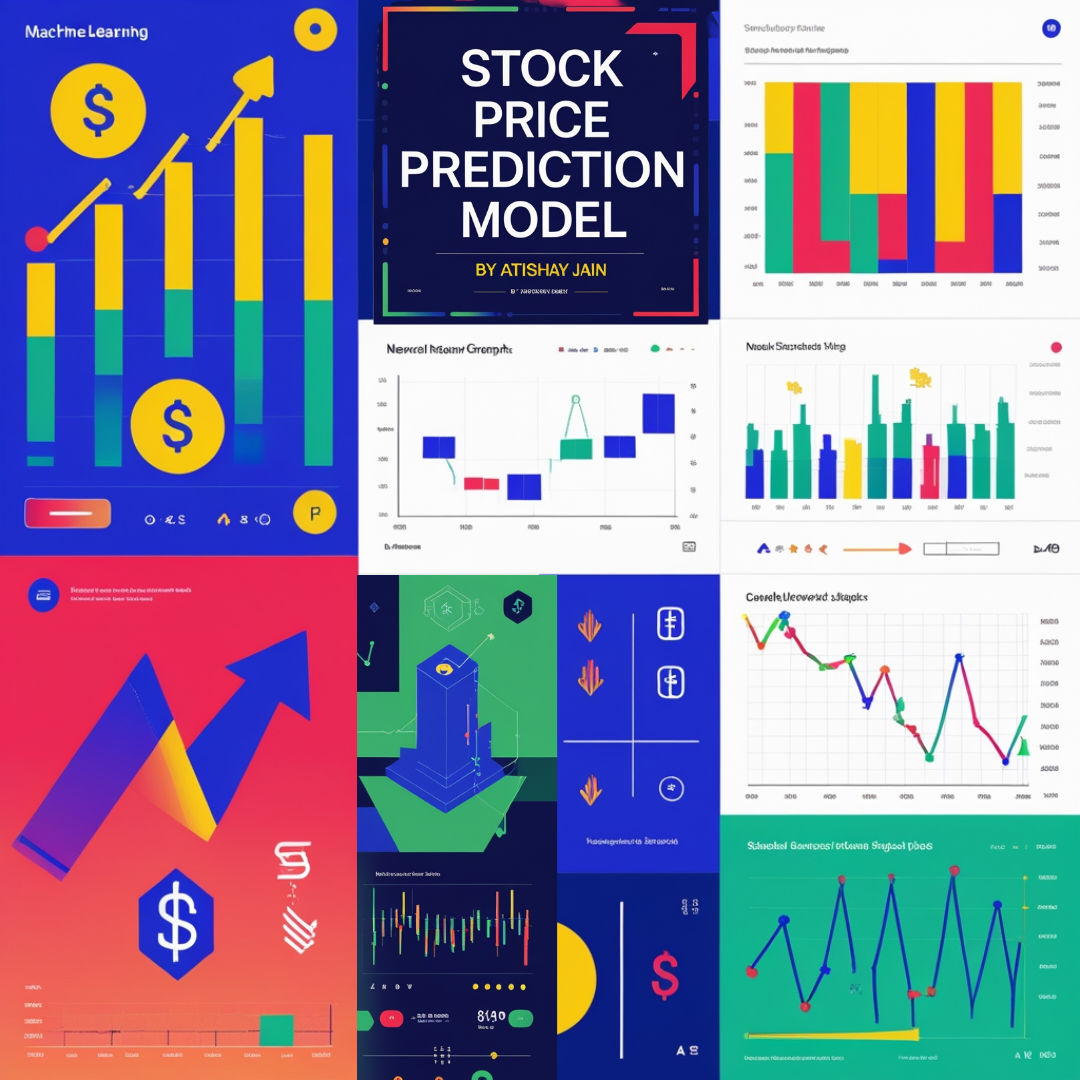

In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import logging

In [29]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [30]:
def fetch_stock_data(symbol: str, start_date: str, end_date: str) -> pd.DataFrame:
    try:
        stock = yf.Ticker(symbol)
        df = stock.history(start=start_date, end=end_date)
        return df
    except Exception as e:
        logger.error(f"Error fetching stock data: {e}")
        raise

In [31]:
def prepare_data(data: pd.DataFrame, lookback_days: int) -> tuple:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(lookback_days, len(scaled_data)):
        X.append(scaled_data[i-lookback_days:i, 0])
        y.append(scaled_data[i, 0])

    return np.array(X), np.array(y), scaler

In [32]:
def create_lstm_model(input_shape: tuple) -> Sequential:
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [33]:
def train_model(model: Sequential, X: np.ndarray, y: np.ndarray, epochs: int = 100,
                batch_size: int = 32, validation_split: float = 0.2) -> None:
    X = X.reshape((X.shape[0], X.shape[1], 1))
    model.fit(X, y, epochs=epochs, batch_size=batch_size,
              validation_split=validation_split, verbose=1)

In [34]:
def make_predictions(model: Sequential, X: np.ndarray, scaler: MinMaxScaler) -> np.ndarray:
    X = X.reshape((X.shape[0], X.shape[1], 1))
    predictions = model.predict(X)
    return scaler.inverse_transform(predictions)

In [35]:
def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray) -> dict:
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

In [36]:
def plot_predictions(y_true: np.ndarray, y_pred: np.ndarray, title: str = "Stock Price Prediction") -> None:
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [37]:
def main():
    symbol = input("Enter stock symbol (e.g., AAPL): ").upper()
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    lookback_days = 60
    epochs = 50

    data = fetch_stock_data(symbol, start_date, end_date)

    X, y, scaler = prepare_data(data, lookback_days)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = create_lstm_model((lookback_days, 1))
    train_model(model, X_train, y_train, epochs=epochs)

    y_pred = make_predictions(model, X_test, scaler)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    metrics = evaluate_model(y_test_unscaled, y_pred)
    print(f"\nModel Performance Metrics for {symbol}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    plot_predictions(y_test_unscaled, y_pred, f"{symbol} Stock Price Prediction")


***Testing***


---



Enter stock symbol (e.g., AAPL): A
Enter start date (YYYY-MM-DD): 2020-01-01
Enter end date (YYYY-MM-DD): 2023-12-31
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0439 - val_loss: 0.0022
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Model Performance Metrics for A:
MSE: 18.3449
RMSE: 4.2831
MAE: 3.4759
R2: 0.8104


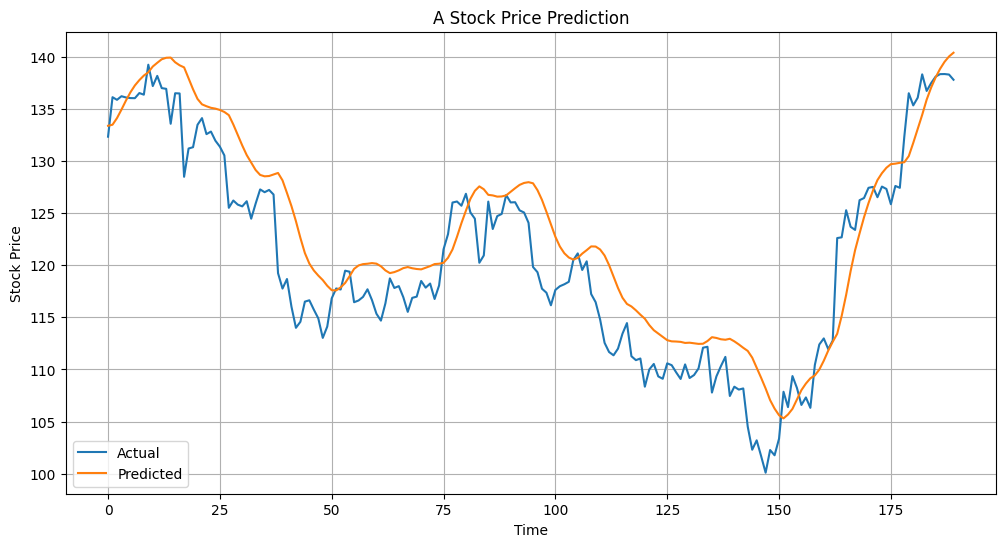

In [43]:
main()

Enter stock symbol (e.g., AAPL): AAPL
Enter start date (YYYY-MM-DD): 2020-07-01
Enter end date (YYYY-MM-DD): 2024-12-31
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0529 - val_loss: 0.0288
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0060 - val_loss: 0.0106
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 - val_l

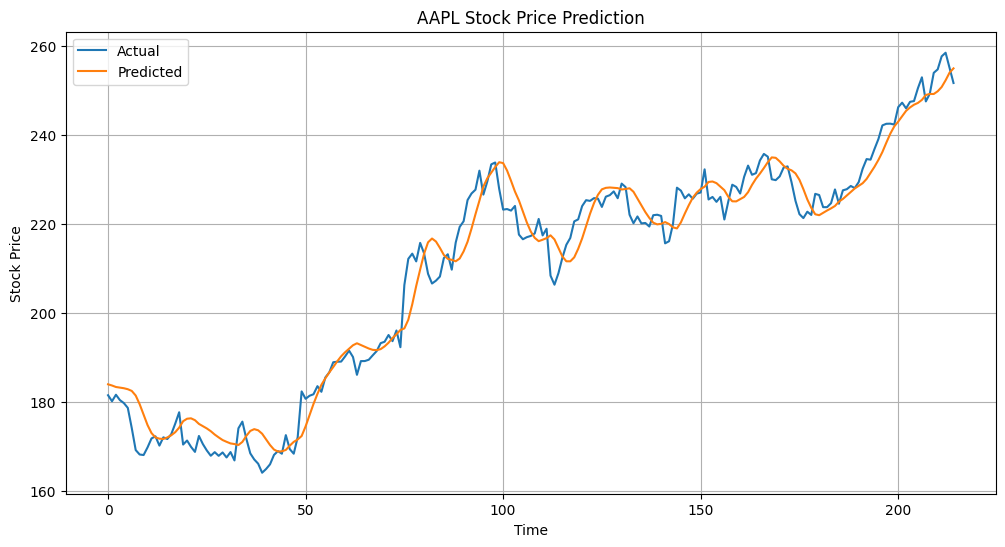

In [45]:
main()

Enter stock symbol (e.g., AAPL): B
Enter start date (YYYY-MM-DD): 2019-01-01
Enter end date (YYYY-MM-DD): 2024-12-31
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1217 - val_loss: 0.0025
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - val_loss: 0.0033
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076 - val_loss: 0.0023
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0055 - val_l

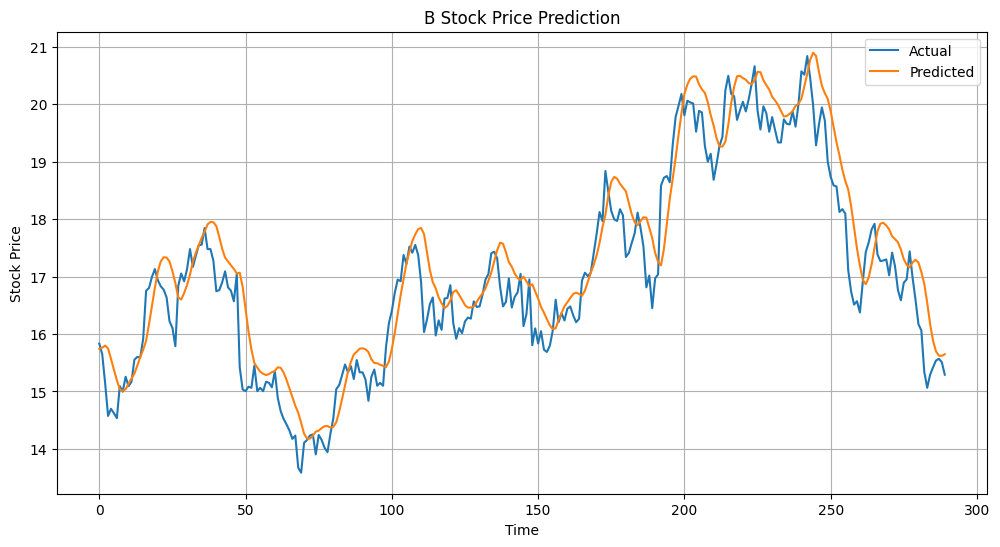

In [46]:
main()

Enter stock symbol (e.g., AAPL): Z
Enter start date (YYYY-MM-DD): 2020-01-02
Enter end date (YYYY-MM-DD): 2023-07-20
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1163 - val_loss: 0.0092
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - val_loss: 0.0123
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0094 - val_loss: 0.0030
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 8.8245e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - val_loss: 4.6206e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044 - val_loss: 4.0913e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 7.0107e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - val_loss: 2.8408e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - val_loss: 4.0585e-04
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035 - val_loss: 5.9653e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035 - val_loss: 6.2349e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 

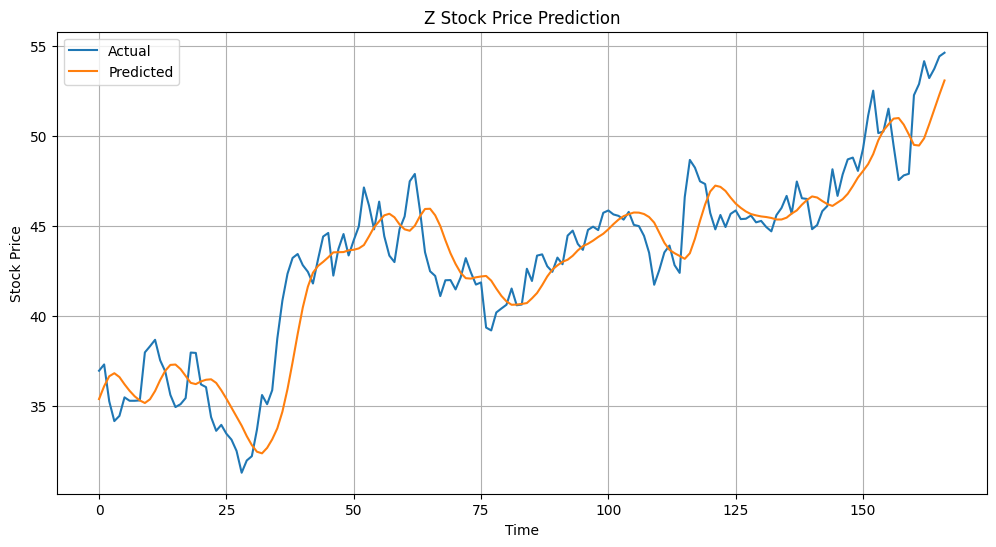

In [49]:
main()

***Tried to give an invalid input***



---



In [54]:
main()

Enter stock symbol (e.g., AAPL): ATISHAY
Enter start date (YYYY-MM-DD): 2020-12-31
Enter end date (YYYY-MM-DD): 2023-12-31


ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:$ATISHAY: possibly delisted; no timezone found


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [55]:
pip freeze > requirements.txt